# Consensus Income Classification Data Analysis

## Introduction

In the workforce, many factors can influence an individual’s salary. These can include (but are not limited to): level of education, occupation, age, sex, and race. Data from the U.S. Bureau of Labor Statistics found that men working in management earned more than their female counterparts, while people working in the service industry generally made the smallest salaries. In our project, we will design a classification model that will predict if an individual will make more than or less than \$50,000, based on specific predictors. 

Would an 18 year old high school graduate working 40 hours per week have made more or less than \$50,000 annually in 1994?

The dataset we are using is from the UCI Machine Learning Repository and summarizes U.S. census data from 1994. It contains variables identifying age, work class, education, marital status, occupation, relationship, race, sex, capital gain and loss, hours per week, and native country. The variables influence whether an individual makes less than or more than \\$50,000. We will select specific variables to predict an individual’s categorical salary (less than or greater than $50,000).

We will use the K-nearest neighbors model to find the K value that helps us obtain the most accurate prediction for our classification. We will use the variables: age, years of education, and hours worked per week to predict if a U.S. citizen's income is greater or less than \$50,000. K-nearest neighbors works best as we are predicting a binary variable with numerical variables. Age is measured in years (where every individual is older than 16 years of age), and hours-per-week are measured in hours, and the data is scaled where a high school graduate has 9 years of education. Because there are a variety of variables within our dataset, we first selected the columns containing numeric values. From there, we chose age, education level, and hours worked per week for the following reasons. Age is going to be an important factor when predicting income because those who are older are likely bringing experience and seniority to their job, potentially generating them more income.  Level of education is also important because those who have higher education are trained in a specific area of expertise, bringing more skills to their role. Doing this generates the company more profit, so they are paid more. Additionally, high paying jobs like doctors and lawyers require many years of education. Hours worked per week is directly related to income because the more hours an individual works, the more money they will be earning (if they are paid by the hour). We chose to stick to 3 predictors to help our visualizations be easier to interpret. 

We expect to find a correlation between our predictors (age, hours worked per week, level of education) and an individual’s salary. Based on Figures 1, 2, and 3 in the preliminary data analysis, our hypothesis is that an individual is more likely to make over \\$50,000 as these specific predictors increase. Therefore we expect that the answer to our question—would an 18 year old high school graduate working 40 hours a week make more or less than \$50,000, would most likely be no. As age and years of education are on the low end we hypothesize that this individual would earn fewer than 50,000 USD in 1994. 


## Methods and Results

**Importing Libraries**

Loading packages needed for the analysis using the library function.

In [2]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)
install.packages("themis")
library(themis)
options(repr.matrix.max.rows = 6) #displays maximum of 6 rows of dataframe

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading and Tidying Data**

Reading our data from the web using read_csv. In this step, the data is also being tidied. 

In [3]:
options(repr.plot.width = 8, repr.plot.height = 7)
set.seed(2022)
consensus_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", col_names = FALSE)
colnames(consensus_data) <- c("age", "workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")
consensus_data <- mutate(consensus_data, income = as_factor(income))

consensus_subset <- consensus_data |>
                    select(age, education_num, hours_per_week, income)
consensus_subset

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,education_num,hours_per_week,income
<dbl>,<dbl>,<dbl>,<fct>
39,13,40,<=50K
50,13,13,<=50K
38,9,40,<=50K
⋮,⋮,⋮,⋮
58,9,40,<=50K
22,9,20,<=50K
52,9,40,>50K


Table 1: This is a table of the wrangled and tidied data displaying income and the predictor variables to be used during the classification.

**Splitting Dataset into Training and Testing**

The initial_split function is used to separate the data into 2 smaller datasets: training data and testing data. There are 32561 data points so using 60% training data gives us a lot of data to train our model with but not too much data for processing time. We set.seed(2022) to make sure the randomization of the data split is reproducible.

In [4]:
set.seed(2022)
#Splitting data into 60% training and 40% testing sets
consensus_split <- initial_split(consensus_subset, prop = .60, strata = income)
consensus_training <- training(consensus_split) 
consensus_testing <- testing(consensus_split)

### Exploratory Data Analysis

In [5]:
# Summarizing number of observations per classification category
counts <- group_by(consensus_training, income) |>
          summarize(n = n())
counts

income,n
<fct>,<int>
<=50K,14832
>50K,4704


Table 2: A count of all of the training data, divided into categories based on income. By counting the number of observations in each income category (less than or greater than $50,000), we can easily and quickly see if we need to balance the data during our analysis. In the case of our dataset, there is a 3:1 ratio of less than 50K: greater than 50K. Since they are similar, balancing the data is not necessary, but we chose to perform it, to make our prediction as accurate as possible.

In [6]:
#Means of the predictor variables that will be used within the analysis
predictor_averages <- consensus_training |>
                      select(-income)|>
                      summarize(across(age:hours_per_week, mean, na.rm = TRUE))
predictor_averages

age,education_num,hours_per_week
<dbl>,<dbl>,<dbl>
38.53378,10.09649,40.40018


Table 3: This table shows the mean of each predictor variable in the dataset that we will use. By calculating the mean of each variable, we are given a better understanding of the data and what sort of values we are dealing with. Here, we see that both age and hours worked per week both have a mean of about 40, while the average numerical level of education is about 10 years.

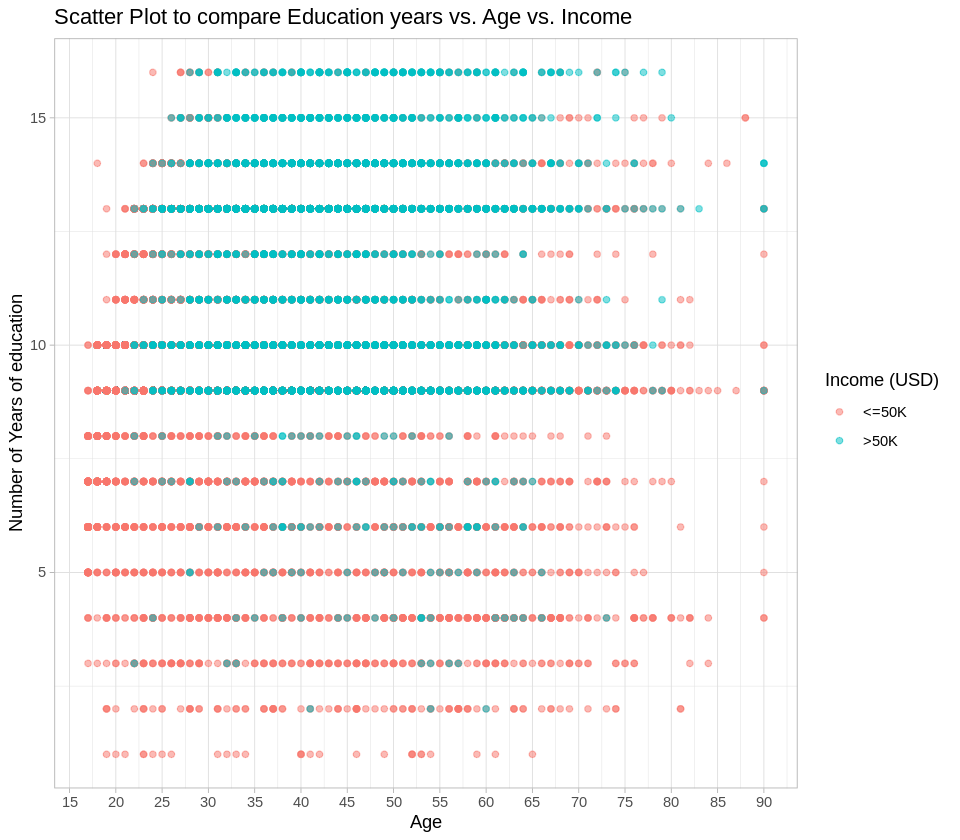

In [7]:
#scatter plots to compare every variable against income:
age_and_yrs_plot <- ggplot(data = consensus_training, aes(x = age, y = education_num)) +
                geom_point(aes(color = income), alpha = 0.5) +
                labs(x = "Age", y = "Number of Years of education", color = "Income (USD)") +
                ggtitle("Scatter Plot to compare Education years vs. Age vs. Income") +
                scale_x_continuous(breaks = seq(0, 100, by = 5)) +
                scale_y_continuous(breaks = seq(0, 20, by = 5)) +                
                theme_light()
age_and_yrs_plot

Figure 1: There seems to be a correlation between income and number of years of education. Seen in the graph The majority of people that have nine plus years of education make over \\$50,000 USD, which enables our hypothesis that as the number of education years increase it is more likely for an individual to make more than \\$50,000. A correlation between age and income is somewhat present that the median of ages make over 50 grand.

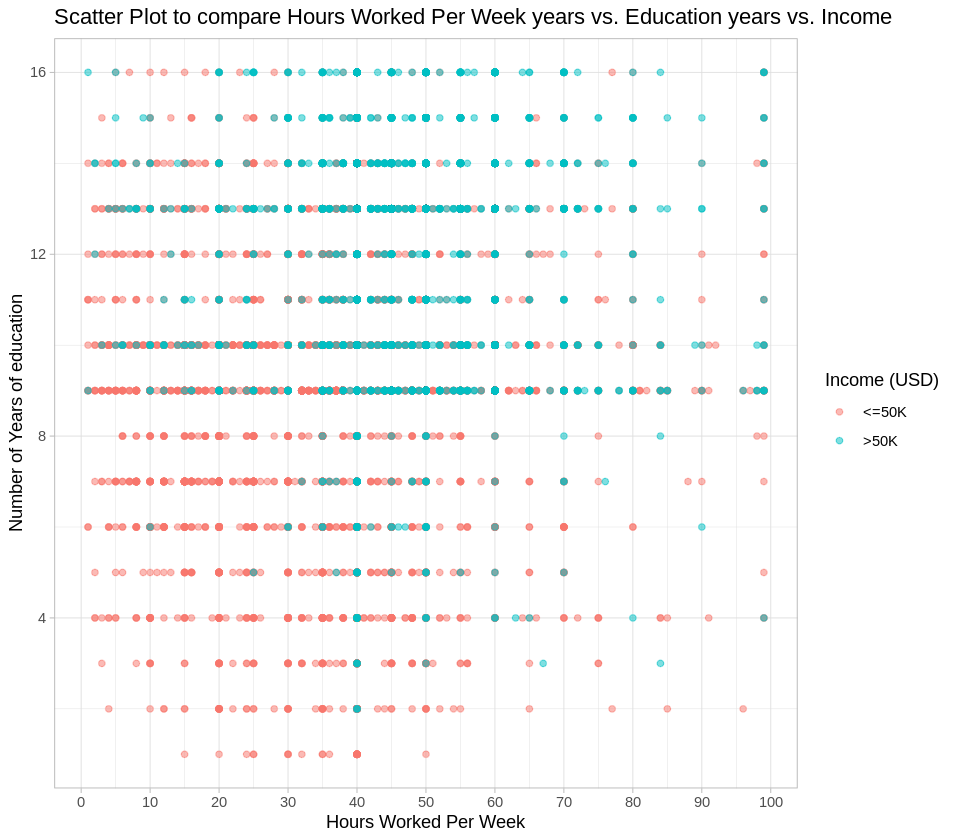

In [8]:
age_and_hrs_plot <- ggplot(data = consensus_training, aes(x = hours_per_week, y = education_num)) +
                geom_point(aes(color = income), alpha = 0.5) +
                labs(x = "Hours Worked Per Week", y = "Number of Years of education", color = "Income (USD)") +
                ggtitle("Scatter Plot to compare Hours Worked Per Week years vs. Education years vs. Income") +
                scale_x_continuous(breaks = seq(0, 120, by = 10)) +
                scale_y_continuous(limits = c(1, 16, by=4)) +
                theme_light()
age_and_hrs_plot

Figure 2: The graph comparing hours worked per week and the number of years of education indicates a relationship among the hours worked per week and annual income. As the majority of people who work 40 plus hours a week make greater than $50,000. From this visualization we can expect that generally someone who works more hours per week makes more money—possibly the divider between greater than or less than 50 thousand.

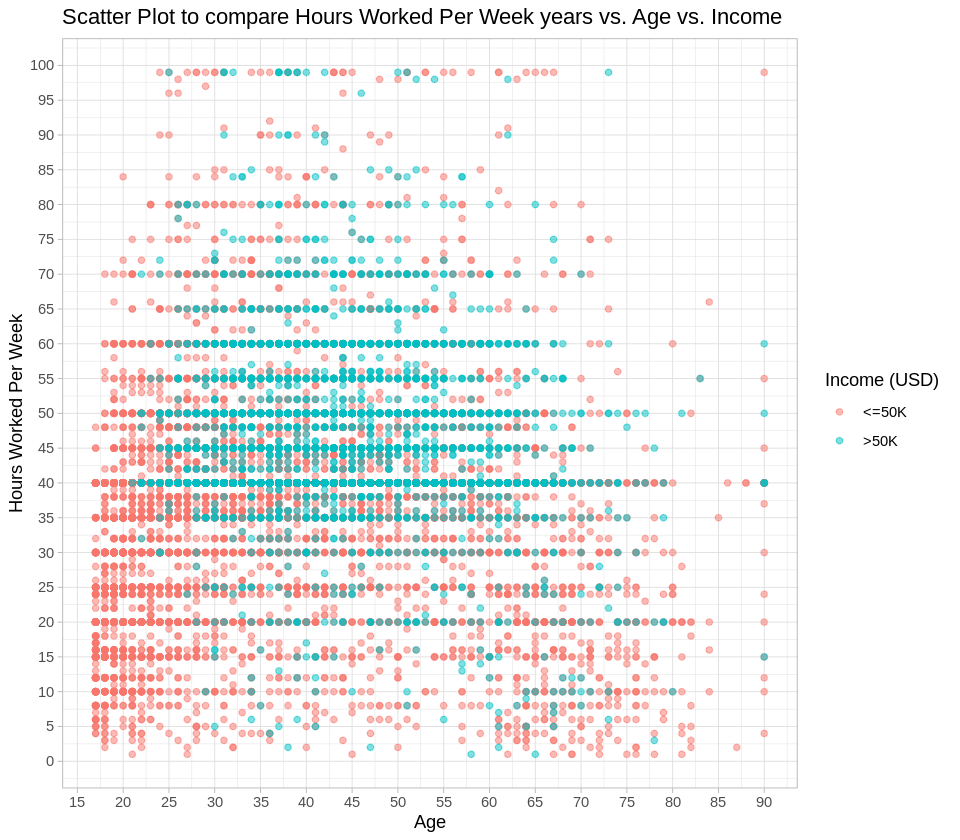

In [9]:
age_and_hrs_plot <- ggplot(data = consensus_training, aes(x = age, y = hours_per_week)) +
                geom_point(aes(color = income), alpha = 0.5) +
                labs(x = "Age", y = "Hours Worked Per Week", color = "Income (USD)") +
                ggtitle("Scatter Plot to compare Hours Worked Per Week years vs. Age vs. Income") +
                scale_x_continuous(breaks = seq(0, 100, by = 5)) +
                scale_y_continuous(breaks = seq(0, 100, by = 5)) +
                theme_light()
age_and_hrs_plot

Figure 3: The graph which compares the number of years of education and hours worked per week aligns with the prior visualizations that as both variables increase an indiviual is more likely to have an income above $50,000 USD in 1994.

### Data Analysis

**Balancing Class Assignment in Dataset**

Creating a recipe function with step_upsample to balance our data. We write “income ~.” to indicate that we want to use all the variables in our wrangled data as predictors for income. Here, we also commit the computations in the recipe by using the prep function. 

In [9]:
#Creating upsampling recipe

income_recipe <- recipe(income ~ ., data = consensus_training) |>
            step_upsample(income, over_ratio = 1, skip = FALSE) |>
            prep()

In [10]:
#Applying upsampling recipe onto training data
scaled_income <- bake(income_recipe, consensus_training)

#Checking to see if classes are balanced after upsampling
upsampled_counts <- group_by(scaled_income, income) |>
                    summarize(n = n())
upsampled_counts

income,n
<fct>,<int>
<=50K,14832
>50K,14832


Table 4: Similarly to table 2, we see a count of all the observations based on their income classification.

**Scaling and Centering Data**

The recipe is performed again to scale and center the data. Again, we specify “income ~.,” to indicate that we want to use all the remaining variables as predictors. 

In [11]:
#Scaling predictors
income_recipe2 <- recipe(income ~ ., data = scaled_income) |>
             step_scale(all_predictors()) |>
             step_center(all_predictors())

**Specifying KNN Model for Training**

We create the knn model using the nearest_neighbors function. Here, we specify “neighbors = tune” to tell R that we want to perform cross-validation in a later cell to obtain the most accurate value of K. 

In [12]:
#Specifying KNN-classification model for finding best K
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

**Specifying Cross-validation Parameters**

Cross-validation is performed using the vfold_cv function, with 5 folds for computation efficiency when testing for larger k-values.

In [13]:
#5 fold cross-validation
income_vfold <- vfold_cv(scaled_income, v = 5, strata = income)

**Specifying and Testing Range of K Values on Training Data**

We specify how many k values we want to test by using tibble, here we want to see 21 possible values of K. Workflow tells R to fit the recipe and the knn model together. 

In [14]:
set.seed(2022)
#Making Workflow
k_vals <- tibble(neighbors = seq(from = 1, to = 21, by = 1))

knn_results <- workflow() |>
       add_recipe(income_recipe2) |>
       add_model(knn_tune) |>
       tune_grid(resamples = income_vfold, grid = k_vals) |>
       collect_metrics()

**Collecting and Plotting Accuracies for K-values**

In this cell, we collect the accuracy metrics by filtering. We also plot accuracy vs neighbors to determine the best value to choose as K. 

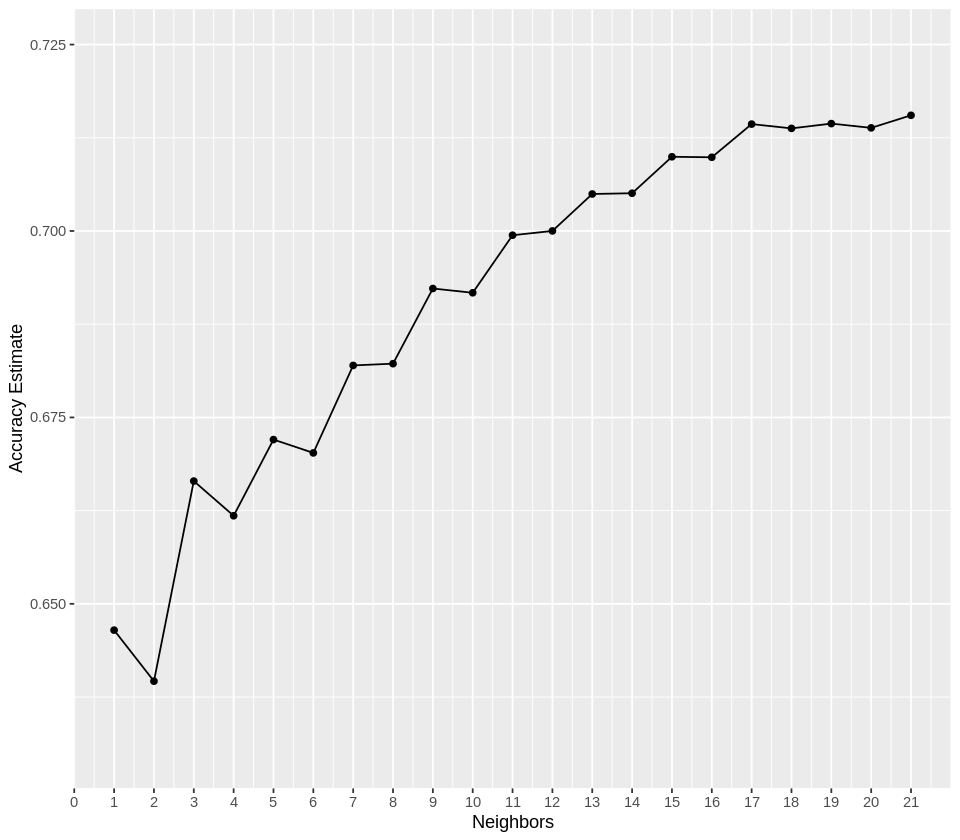

In [15]:
#Collecting accuracy metrics
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

#Plotting accuracy against K to determine best K
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") + 
       scale_x_continuous(breaks = seq(0, 21, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.63,0.725)) # adjusting the y-axis
accuracy_versus_k

Figure 4: Accuracy Estimate plotted against the number of neighbors. Accuracy increases with neighbors and reaches a maximum accuracy estimate of ~0.71 when neighbors = 17.

**Finalizing KNN Model**

Here, we finalize the KNN model with the best K value: 17. The workflow is also performed again to combine the recipe and the new KNN model.

In [16]:
#Finalizing new KNN-model with best K value  
income_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
       set_engine("kknn") |>
       set_mode("classification")

income_fit <- workflow() |>
             add_recipe(income_recipe2) |>
             add_model(income_spec) |>
            fit(data = scaled_income)

**Applying Finalized KNN Model on to Test Data**

Here we apply our finalized KNN model to our test data to predict its classes in order to determine the accuracy of our model.  

In [17]:
set.seed(2022)
#Testing model by predicting classification on test data
income_predictions <- predict(income_fit, consensus_testing) |>
                        bind_cols(consensus_testing)

#Collecting accuracy of model
income_metrics <- income_predictions |> 
                metrics(truth = income, estimate = .pred_class)
head(income_metrics, n=1)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7528599


Table 5: Displays the estimated accuracy of our model when predicting on unknown data

In [18]:
#Creating confusion matrix of model accuracy
income_conf_mat <- income_predictions |>
                conf_mat(truth = income, estimate = .pred_class) 

income_conf_mat

          Truth
Prediction <=50K >50K
     <=50K  8084 1415
     >50K   1804 1722

Figure 5: Displays a confusion matrix of our model accuracy that allows one to see the specific number of classes both correctly and incorrectly identified by our model.

In [19]:
set.seed(2022)
#Predicting hypothesis question
new_obs <- tibble(age = 18, education_num = 9, hours_per_week = 40)
predict(income_fit, new_obs)

.pred_class
<fct>
<=50K


Table 6: This table only contains one observation, essentially answering our project question. We see that our model has predicted that an 18 year old high school graduate will make less than or equal to 50K when working 40 hours per week.

## Discussion

**Summary of Results:**

With an accuracy of 75.29%, by conducting our data analysis we have formulated a predictive KNN-classification model that has correctly predicted the incomes of 9807 individuals, and incorrectly predicted the incomes of another 3218 of a total of 13025 individual observations.

To try and better understand our accuracy results a further analysis of our predictions using a confusion matrix provided us with some good insights. By observing the confusion matrix we noticed that our model was very good at predicting incomes less than or equal to \\$50,000 (<=50K) with an accuracy of around 81.76%, however, failed to meet similar standards when predicting incomes greater than $50,000 (>50K) by producing a prediction accuracy of 54.90%.

Overall, our model did not turn out to be as accurate as we had anticipated, and doesn’t really provide us much insight as to how well our predictors influence the income of an individual. We had originally believed that our chosen factors, age, years of education, and hours worked weekly, would play a vital role in determining an individual’s income, but that hypothesis doesn’t seem to align with our results.

**Expected to find:**

As stated in our introduction, we did expect our predictor variables to have some correlation with income which is evident in our model having 75.29% accuracy. However, we were not expecting such a discrepancy in our model's success while predicting either greater or fewer than \\$50,000. Our model has a much higher success rate classifying individuals who made fewer than \\$50,000 USD compared to those greater. Our hypothesis to our posed question was that an 18 year old, working 40 hours a week, who graduated high school, would make less than \\$50,000 which is what our model predicted. As our model has pretty good accuracy (81.76%) when classifying <=$50,000 we have confidence that this prediction holds true.

**Impact of our Findings:**

In general, our findings could provide insight into the importance of education in choosing a career path. We may also see income disparity among our selected predictors, which can be informative for suggesting what status the U.S. economy favors. Additionally, our investigation could be beneficial for a student’s decision of continuing their education or entering the workforce.

**Future Questions:**

As this data is from an old census, a future question could be to investigate these same predictors with more recent data and see how income disparity has shifted among age, hours worked per week, and education level. Furthermore, we could analyze global events and the shift in western culture to ask if they have made a recent impact on income patterns, using the same predictors

## References

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

U.S. Bureau of Labor Statistics. (2011, September 14). Earnings and employment by occupation, race, ethnicity, and sex, 2010. 
U.S. Bureau of Labor Statistics. Retrieved December 3, 2022, from https://www.bls.gov/opub/ted/2011/ted_20110914.htm

U.S. Bureau of Labor Statistics. (2017, August 25). Women's and Men's earnings by age in 2016. U.S. Bureau of Labor Statistics. Retrieved December 3, 2022, from https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm

Smart, J.C. (1991). Gender Equity in Academic Rank and Salary. The Review of Higher Education 14(4), 511-525. doi:10.1353/rhe.1991.0011.